In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
import random
import matplotlib.pyplot as plt

In [2]:
dataset = 'tpehgt'

In [3]:
data_dir = os.path.join("..", "Source Data", "Normalized Data", dataset + "_preprocessed.npy")
data = np.load(data_dir, allow_pickle=True)
data[0]

{'record_name': 'tpehgt_n001',
 'signal': array([[-0.3572203 , -0.47718542,  0.09347976, -0.58625739,  1.53069135,
          0.53433577],
        [-0.37258616, -0.49002034,  0.17294405, -0.46216611,  1.30411315,
          0.37929137],
        [-0.38098943, -0.49502235,  0.25093216, -0.33918327,  1.08032661,
          0.22466365],
        ...,
        [ 0.05994346,  0.15663173, -1.17292491, -1.16269821, -0.34433375,
         -0.34008705],
        [ 0.06914767,  0.16370129, -1.15839364, -1.14823168, -0.3553319 ,
         -0.34998603],
        [ 0.0773156 ,  0.16995223, -1.14499772, -1.13489891, -0.36427823,
         -0.35800565]], shape=(32900, 6))}

In [4]:
# Define the path to save the new dataset
save_dir = os.path.join("..", "Source Data", "Univariate Data", dataset + "_univariate.npy")

# Initialize a list for storing modified entries
univariate_data = []

for entry in data:
    # Copy the entry to preserve metadata
    new_entry = entry.copy()

    # Extract the signal matrix (shape: (599999, 6))
    signal_matrix = entry['signal']
    
    # Apply PCA to reduce from 6D to 1D
    pca = PCA(n_components=1)
    reduced_signal = pca.fit_transform(signal_matrix)  # Shape: (599999, 1)
    print(reduced_signal.shape)
    # Flatten to (599999,) to retain time-series format
    new_entry['signal'] = reduced_signal.flatten()

    # Append modified entry to the new dataset
    univariate_data.append(new_entry)

# Convert to a NumPy array and save
np.save(save_dir, np.array(univariate_data, dtype=object))

print(f"PCA transformation complete. Saved as '{save_dir}'.")

(32900, 1)
(32880, 1)
(32900, 1)
(33060, 1)
(32800, 1)
(33600, 1)
(33599, 1)
(33600, 1)
(33600, 1)
(33600, 1)
(33600, 1)
(33600, 1)
(33600, 1)
(33599, 1)
(33600, 1)
(33599, 1)
(33600, 1)
(33599, 1)
(33600, 1)
(33600, 1)
(33599, 1)
(33599, 1)
(33599, 1)
(33600, 1)
(33600, 1)
(33599, 1)
(33599, 1)
(33599, 1)
(33599, 1)
(33600, 1)
(33600, 1)
PCA transformation complete. Saved as '../Source Data/Univariate Data/tpehgt_univariate.npy'.


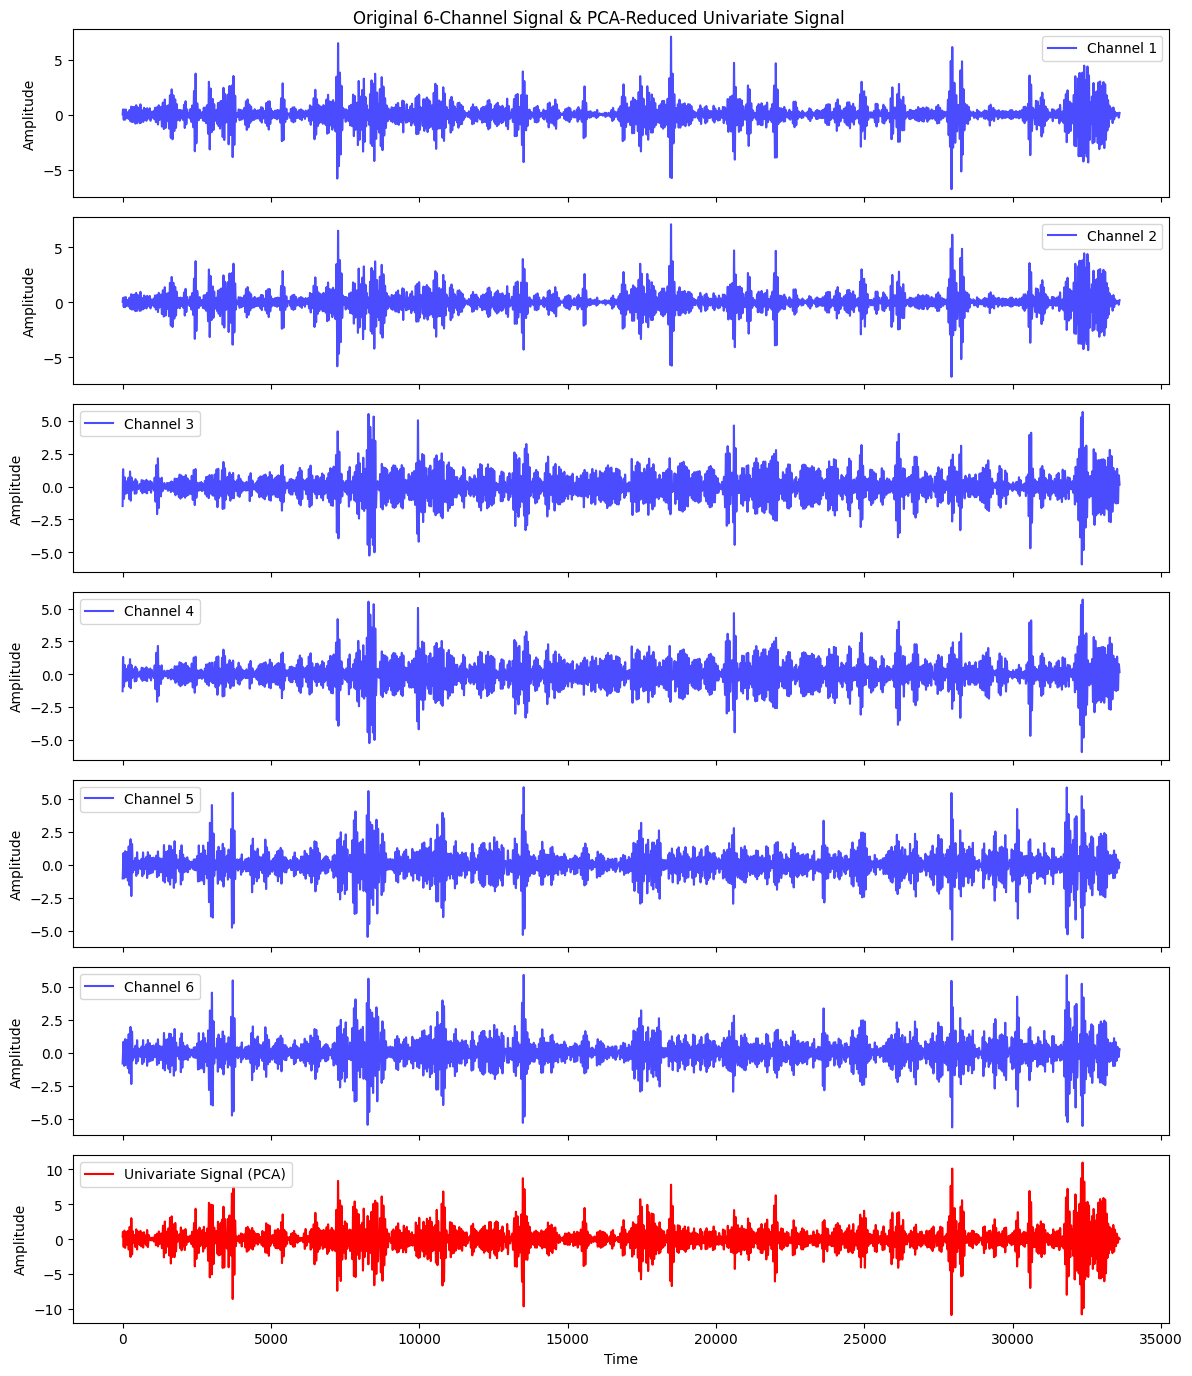

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Load dataset
data_path = os.path.join("..", "Source Data", "Univariate Data", dataset + "_univariate.npy")
data = np.load(data_path, allow_pickle=True)

# Select a random instance for visualization
random_instance = random.choice(data)
univariate_signal = random_instance['signal']  # Univariate after PCA

# Load the original dataset before PCA
original_data_path = os.path.join("..", "Source Data", "Normalized Data", dataset + "_preprocessed.npy")
original_data = np.load(original_data_path, allow_pickle=True)

# Find the corresponding original signal
record_name = random_instance['record_name']
original_instance = next(entry for entry in original_data if entry['record_name'] == record_name)
original_multivariate_signal = original_instance['signal']  # Shape: (sequence_length, num_channels)

num_channels = original_multivariate_signal.shape[1]  

# Create subplots (num_channels + 1 to include the univariate signal)
fig, axs = plt.subplots(num_channels + 1, 1, figsize=(12, 2 * (num_channels + 1)), sharex=True)

time_axis = np.arange(original_multivariate_signal.shape[0])

# Plot all channels dynamically
for i in range(num_channels):
    axs[i].plot(time_axis, original_multivariate_signal[:, i], label=f'Channel {i+1}', color='b', alpha=0.7)
    axs[i].legend()
    axs[i].set_ylabel("Amplitude")

# Plot the univariate signal in a distinct color
axs[num_channels].plot(time_axis, univariate_signal, label="Univariate Signal (PCA)", color='r')
axs[num_channels].legend()
axs[num_channels].set_ylabel("Amplitude")
axs[num_channels].set_xlabel("Time")

fig.suptitle(f"Original {num_channels}-Channel Signal & PCA-Reduced Univariate Signal")
plt.tight_layout()
plt.show()
